In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def c_plate_retardance(aoi,ne,no,wl,d):
    """compute retardance for a c-plate. Equation from Miller et al 2022 https://doi.org/10.1364/OE.458859
    
    Parameters
    ----------
    
    aoi : float
        angle of incidence on the c-plate in radians
        
    ne : float
        extraordinary index of refraction
        
    no : float
        ordinary index of refraction
        
    wl : float
        wavelength of light in meters
        
    d : float
        thickness of film in meters
        
    Returns
    -------
    ret+dis : float
        retardance of the c-plate in radians
    """
    wlp = 0.5e-6
    Ct = 0.198
    ret = 2*np.pi/wl * no * d * (np.sqrt(1-(np.sin(aoi)/ne)**2) - np.sqrt(1-(np.sin(aoi)/no)**2))
    dis = Ct * wl**2 * wlp**2 / (wl**2 * wlp**2) * np.sin(aoi)**2
    
    return ret#+dis
    
def c_plate_jones(aoi,ne,no,wl,d,rotation=0):
    """compute Jones matrix for a c-plate assuming a symmetric retarder. We can only do this because
    the eigenpolarizations for a c-plate are always s- and -p polarizations, according to a private
    communication with Sawyer Miller
    
    Parameters
    ----------
    
    aoi : float
        angle of incidence on the c-plate in radians
        
    ne : float
        extraordinary index of refraction
        
    no : float
        ordinary index of refraction
        
    wl : float
        wavelength of light in meters
        
    d : float
        thickness of film in meters
        
    rotation : float
        rotation of the c-plate in radians. Defaults to 0.
        
    Returns
    -------
    cjones : numpy.ndarray
        jones matrix of the c-plate
    """
    
    ret = c_plate_retardance(aoi,ne,no,wl,d)
    
    cjones = np.array([[np.exp(-1j*ret/2),0*ret],
                       [0*ret,np.exp(1j*ret/2)]])
    
    cjones = np.moveaxis(cjones,-1,0)
    cjones = np.moveaxis(cjones,-1,0)
    
    return cjones

In [3]:
no = 1.70928
ne = 1.50869
aoi = 1 * np.pi/180 * np.linspace(-2,2,21)
wl = 1e-6
d = 0.2e-9
aoiy,aoix = np.meshgrid(aoi,aoi)
aoi = np.sqrt(aoix**2 + aoiy**2)

jones = c_plate_jones(aoi,ne,no,wl,d)

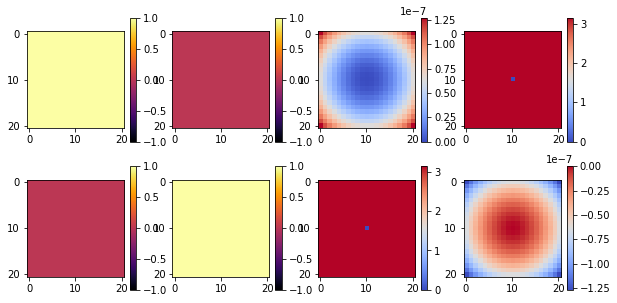

In [4]:
plt.figure(figsize=[10,5])
plt.subplot(241)
plt.imshow(np.abs(jones[...,0,0]),vmin=-1,vmax=1,cmap='inferno')
plt.colorbar()
plt.subplot(242)
plt.imshow(np.abs(jones[...,0,1]),vmin=-1,vmax=1,cmap='inferno')
plt.colorbar()
plt.subplot(245)
plt.imshow(np.abs(jones[...,1,0]),vmin=-1,vmax=1,cmap='inferno')
plt.colorbar()
plt.subplot(246)
plt.imshow(np.abs(jones[...,1,1]),vmin=-1,vmax=1,cmap='inferno')
plt.colorbar()

plt.subplot(243)
plt.imshow(np.angle(jones[...,0,0]),cmap='coolwarm')
plt.colorbar()
plt.subplot(244)
plt.imshow(np.angle(jones[...,0,1]),cmap='coolwarm')
plt.colorbar()
plt.subplot(247)
plt.imshow(np.angle(jones[...,1,0]),cmap='coolwarm')
plt.colorbar()
plt.subplot(248)
plt.imshow(np.angle(jones[...,1,1]),cmap='coolwarm')
plt.colorbar()

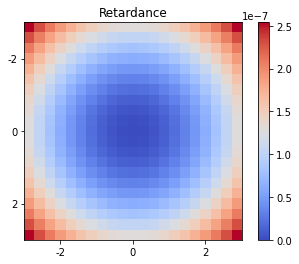

In [5]:
plt.figure()
plt.title('Retardance')
plt.imshow(np.angle(jones[...,0,0])-np.angle(jones[...,1,1]),cmap='coolwarm')
plt.xticks(np.arange(3,23,7),labels=['-2','0','2'])
plt.yticks(np.arange(3,23,7),labels=['-2','0','2'])
plt.colorbar()
plt.show()

In [6]:
from poke.polarization import FresnelCoefficients

In [10]:
n1 = 1
n2 = 1.1978 + 1j*7.0488
aoi = 1 * np.pi/180 * np.linspace(-2,2,21)
aoiy,aoix = np.meshgrid(aoi,aoi)
aoi = np.sqrt(aoix**2 + aoiy**2)

rs,rp = FresnelCoefficients(aoi,n1,n2)

In [11]:
retAl = np.angle(rs)-np.angle(rp*np.exp(1j*np.pi))

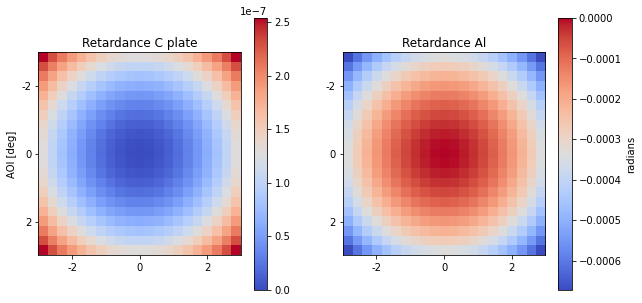

In [12]:
plt.figure(figsize=[10,5])
plt.subplot(121)
plt.title('Retardance C plate')
plt.imshow(np.angle(jones[...,0,0])-np.angle(jones[...,1,1]),cmap='coolwarm')
plt.xticks(np.arange(3,23,7),labels=['-2','0','2'])
plt.yticks(np.arange(3,23,7),labels=['-2','0','2'])
plt.ylabel('AOI [deg]')
plt.colorbar()
plt.subplot(122)
plt.title('Retardance Al')
plt.imshow(retAl,cmap='coolwarm')
plt.xticks(np.arange(3,23,7),labels=['-2','0','2'])
plt.yticks(np.arange(3,23,7),labels=['-2','0','2'])
plt.colorbar(label='radians')
plt.show()